# **BANK MARKETING CAMPAIGN DEPOSIT PREDICTION**

## **Business Problem**

**1. Context**

The types of financial products used by the public are more varied. One financial product that is well-known to the public is term deposits. The term deposit mechanism is that a customer deposits a sum of money at a bank or a financial institution, and the money can only be withdrawn after a certain period of time. As compensation, customers will be given a fixed interest according to the nominal amount of money deposited.

Nevertheless, as business entities with financial products and respective customers, banks still have to compete to not lose customers. One of the ways to acquire new customers is by conducting a marketing campaign.

**2. Problem Statement**

In the banking sector, marketing campaigns often involve offering term deposit subscriptions to existing and potential customers. Traditionally, this process involves contacting all customers manually, which is both time-consuming and costly. To improve efficiency, there is a need for a method to identify and target only those customers who are most likely to subscribe to a term deposit.

A bank has conducted a marketing campaign aimed at promoting term deposit subscriptions to its customers. The campaign was run in the past, and data from this period, including customer demographics and campaign interactions, has been collected. The bank wants to leverage this data to build a predictive model that can identify customers who are likely to subscribe to a term deposit in future campaigns.

**3. Goal**

To develop a predictive model that determines the likelihood of a customer subscribing to a term deposit based on their demographic and campaign-related attributes.

**4. Analytic Approach**

To efficiently predict whether customers will subscribe to a term deposit, we will follow a structured and comprehensive analytic approach that leverages both exploratory data analysis and machine learning techniques. The first step involves data preprocessing, where we will handle any missing values to ensure the dataset is complete and consistent. Categorical variables will be converted into numerical formats using techniques such as one-hot encoding or label encoding, and numerical features will be scaled to standardize their ranges, improving the performance of the machine learning models.

Next, we will conduct exploratory data analysis (EDA) to understand the distribution of each feature, identify patterns, and uncover correlations within the data. This will involve visualizing the data using histograms, box plots, bar charts, and heatmaps. These visualizations will help us gain insights into the relationships between features and the target variable, which is whether a customer subscribes to a term deposit.

Following EDA, we will split the dataset into training and testing sets to develop and evaluate several machine learning models, such as Logistic Regression, Decision Trees, Random Forests, and Gradient Boosting. We will assess the models using metrics like accuracy, precision, recall, and F0.5-score to ensure a comprehensive evaluation. To enhance model performance, we will perform hyperparameter tuning using techniques such as GridSearchCV or RandomizedSearchCV, and employ cross-validation to ensure the model generalizes well to unseen data.

Once the optimal model is selected, we will deploy it for real-time predictions by setting up an endpoint that accepts input data in JSON format and returns predictions.

By following this analytic approach, we aim to develop a robust machine learning model that can accurately predict customer subscriptions to term deposits, thereby optimizing the bank's marketing efforts and improving conversion rates.

**5. Metric Evaluation**

We will use f0.5 score because we are interested in False Positive in positive class without completely ignoring the False Negative.

False Positive (FP) : if a customer is predicted to subscribe to a term deposit, but he/she actually did not.
 
False Negative (FN) : if a customer is predicted to NOT subscribe to a term deposit, but he/she actually did.

FP cost : We waste our money and time to offer non-prospect customer.

FN cost : We lost a potential customer.

# **Data Understanding**

| **Features**        | **Description**                                                                                                        |
|---------------------|------------------------------------------------------------------------------------------------------------------------|
| **Customer Profile**|                                                                                                                        |
| age                 | Age of the individual (numeric)                                                                                        |
| job                 | Type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown') |
| balance             | Balance of the individual (numeric)                                                                                    |
| housing             | Has housing loan? (categorical: 'no', 'yes')                                                                           |
| loan                | Has personal loan? (categorical: 'no', 'yes')                                                                          |
| **Marketing Data**  |                                                                                                                        |
| contact             | Contact communication type (categorical: 'cellular', 'telephone')                                                      |
| month               | Last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                       |
| campaign            | Number of contacts performed during this campaign and for this client (numeric, includes last contact)                  |
| pdays               | Number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |
| poutcome            | Outcome of the previous marketing campaign (categorical: 'failure', 'unknown', 'success', 'other')                     |
| **Target**          |                                                                                                                        |
| deposit             | Whether the customer made a deposit or not (binary: 'yes', 'no')                                                       |

## **Dataset**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay, confusion_matrix, recall_score, fbeta_score, make_scorer, precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [35]:
# Check data nullity and unique value

pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[i].unique() for i in df.columns]
})

,feature,data_type,null,n_unique,sample_unique
0,age,int64,0.0,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,0.0,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,0.0,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,0.0,2,"[no, yes]"
4,loan,object,0.0,2,"[no, yes]"
5,contact,object,0.0,3,"[cellular, telephone, unknown]"
6,month,object,0.0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,0.0,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,0.0,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,0.0,4,"[unknown, other, failure, success]"


In [36]:
# checking duplicates
df.duplicated().sum()

8

In [37]:
df.drop_duplicates(inplace=True)

I decided to drop the duplicates since it's only 8 rows and will not affect the balance of the dataset

In [38]:
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [39]:
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7805.0,41.257783,11.922833,18.0,32.0,39.0,49.0,95.0
balance,7805.0,1513.968225,3090.508938,-6847.0,128.0,550.0,1685.0,66653.0
campaign,7805.0,2.520564,2.728204,1.0,1.0,2.0,3.0,63.0
pdays,7805.0,51.462268,108.115084,-1.0,-1.0,-1.0,41.0,854.0


In [41]:
df.describe(include='object').T

,count,unique,top,freq
job,7805,12,management,1789
housing,7805,2,no,4136
loan,7805,2,no,6781
contact,7805,3,cellular,5623
month,7805,12,may,1973
poutcome,7805,4,unknown,5811
deposit,7805,2,no,4075


## EDA

Checking outliers in numerical features

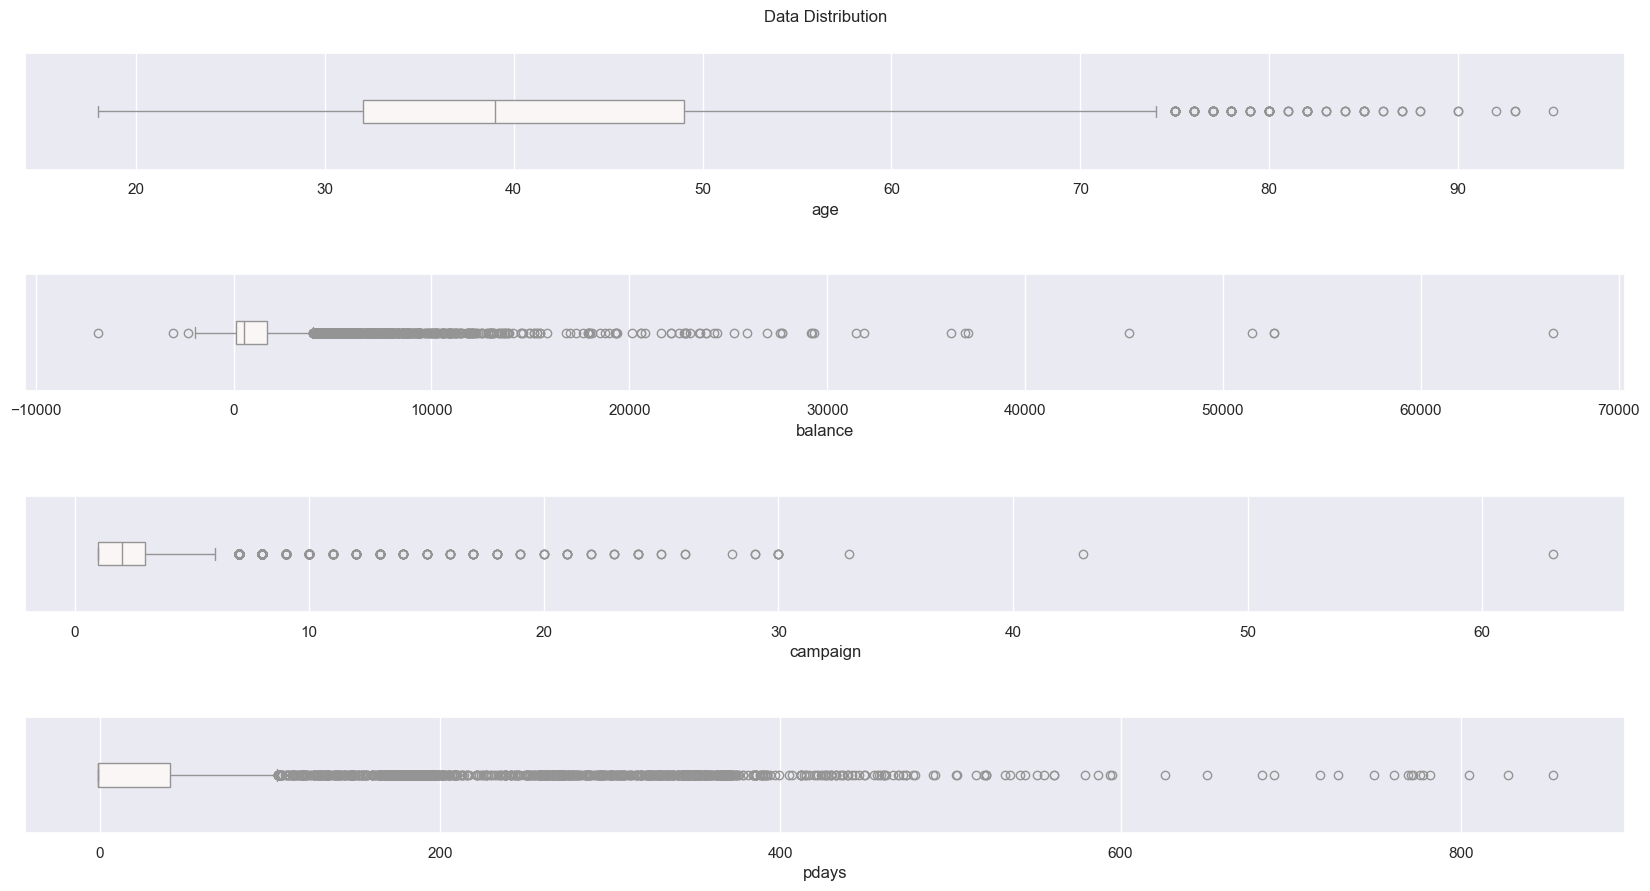

In [42]:
# outliers

fig, ax = plt.subplots(4, 1, figsize=(20, 10))
features = ['age','balance','campaign','pdays']
for k in range(len(features)):
    sns.boxplot(
        x = features[k],
        data = df,
        width = 0.2,
        palette = 'vlag',
        ax = ax[k]
    )

ax[0].set_title('Data Distribution', y = 1.2)
plt.subplots_adjust(
    left = 0.1, bottom = 0.1, right = 0.9, wspace = 0.1, hspace = 0.9
);

we are going to compare the average of each numerical features to our target

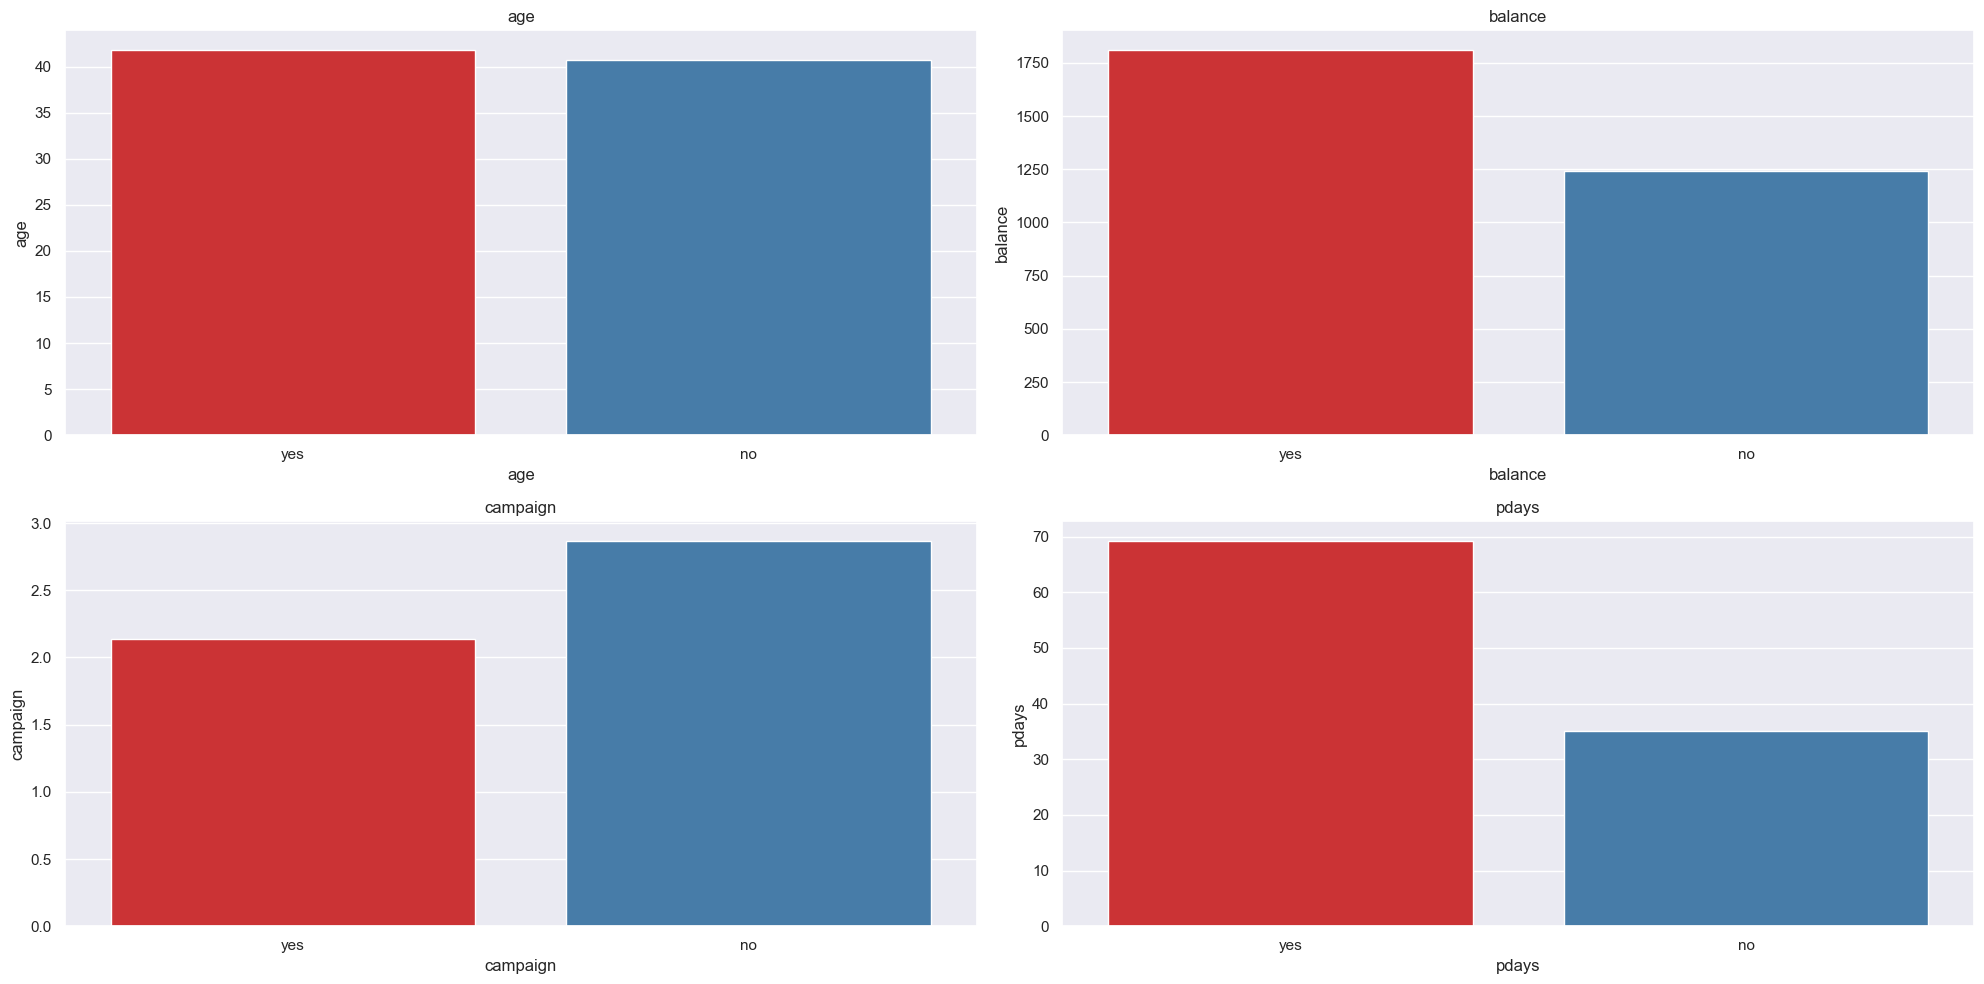

In [43]:
# Numerical Analysis
plt.figure(figsize=(20,10))
sns.set(palette='Set1')
plotnumber = 1

for feature in features:
    ax = plt.subplot(2,2,plotnumber)
    sns.barplot(data=df,x='deposit',y=feature,hue='deposit',errorbar=None)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
    plt.tight_layout()

In [44]:
df.groupby('deposit')[['age','balance','campaign','pdays']].mean()

,age,balance,campaign,pdays
deposit,,,,
no,40.728344,1240.770798,2.869693,35.139141
yes,41.836193,1812.434584,2.139142,69.295174


Age
- People who deposit and not deposit have about the same age average (41.8 years old - 40.7 years old)

Balance
- People who deposit have more balance (1812.4) than the people not deposit (1240.7)

Campaign
- People who deposit have less number of contact during this campaign (2.1) than people not deposit (2.8)

Pdays
- People who deposit have more days after the client was contacted from the previous campaign (69.2 days) than people not deposit (35.1)

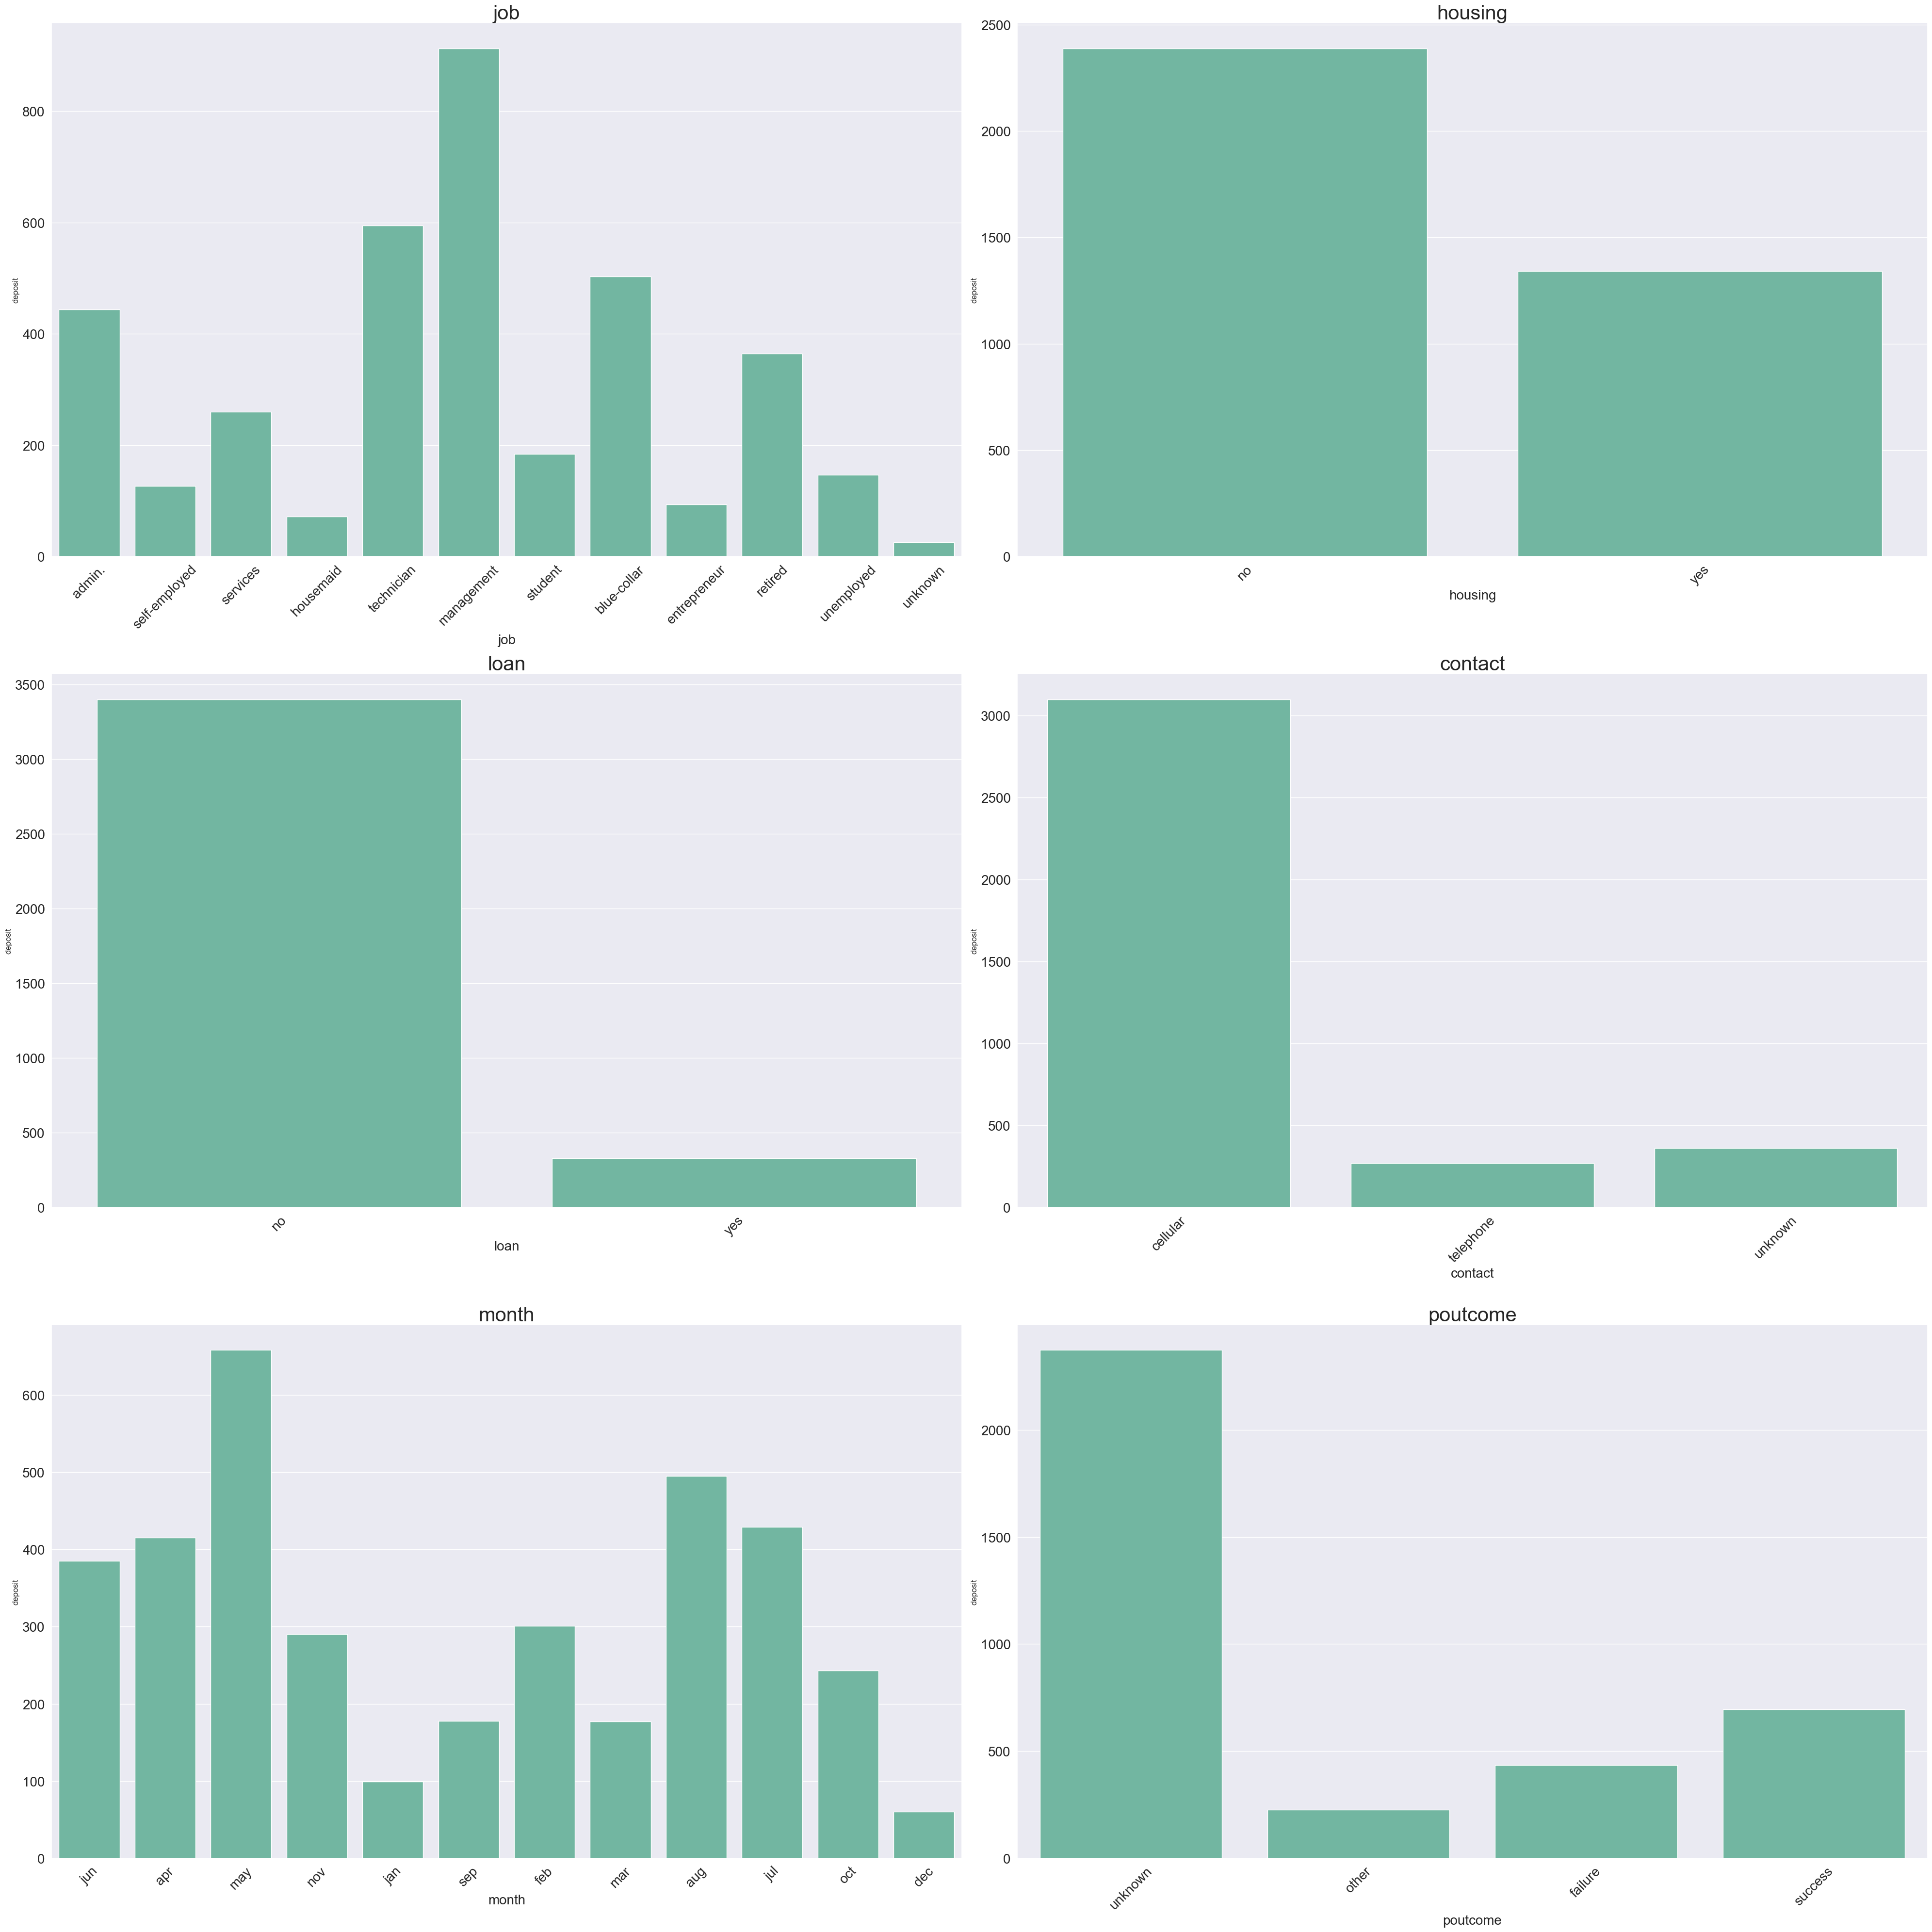

In [45]:
# Categorical Analysis
features = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']

plt.figure(figsize=(40,40))
sns.set(palette='Set2')
plotnumber = 1

for feature in features:
    ax = plt.subplot(3,2,plotnumber)
    sns.barplot(data=df,x=feature,y=df['deposit']=='yes',estimator='sum',errorbar=None)
    plt.xlabel(feature,fontsize=20)
    plt.title(feature,fontsize=30)
    plt.xticks(rotation=45,fontsize=20)
    plt.yticks(fontsize=20)
    plotnumber+=1
    plt.tight_layout()

People who are likely to subscribe to term deposit are in these category:
- People who are working as Management, Technician, or Blue-Collar.
- People who has no housing loan.
- People who has no personal loan.
- People who are contacted through cellular.
- People who are last contacted in May, August, or July.
- People in previous campaign with unknown or success label.

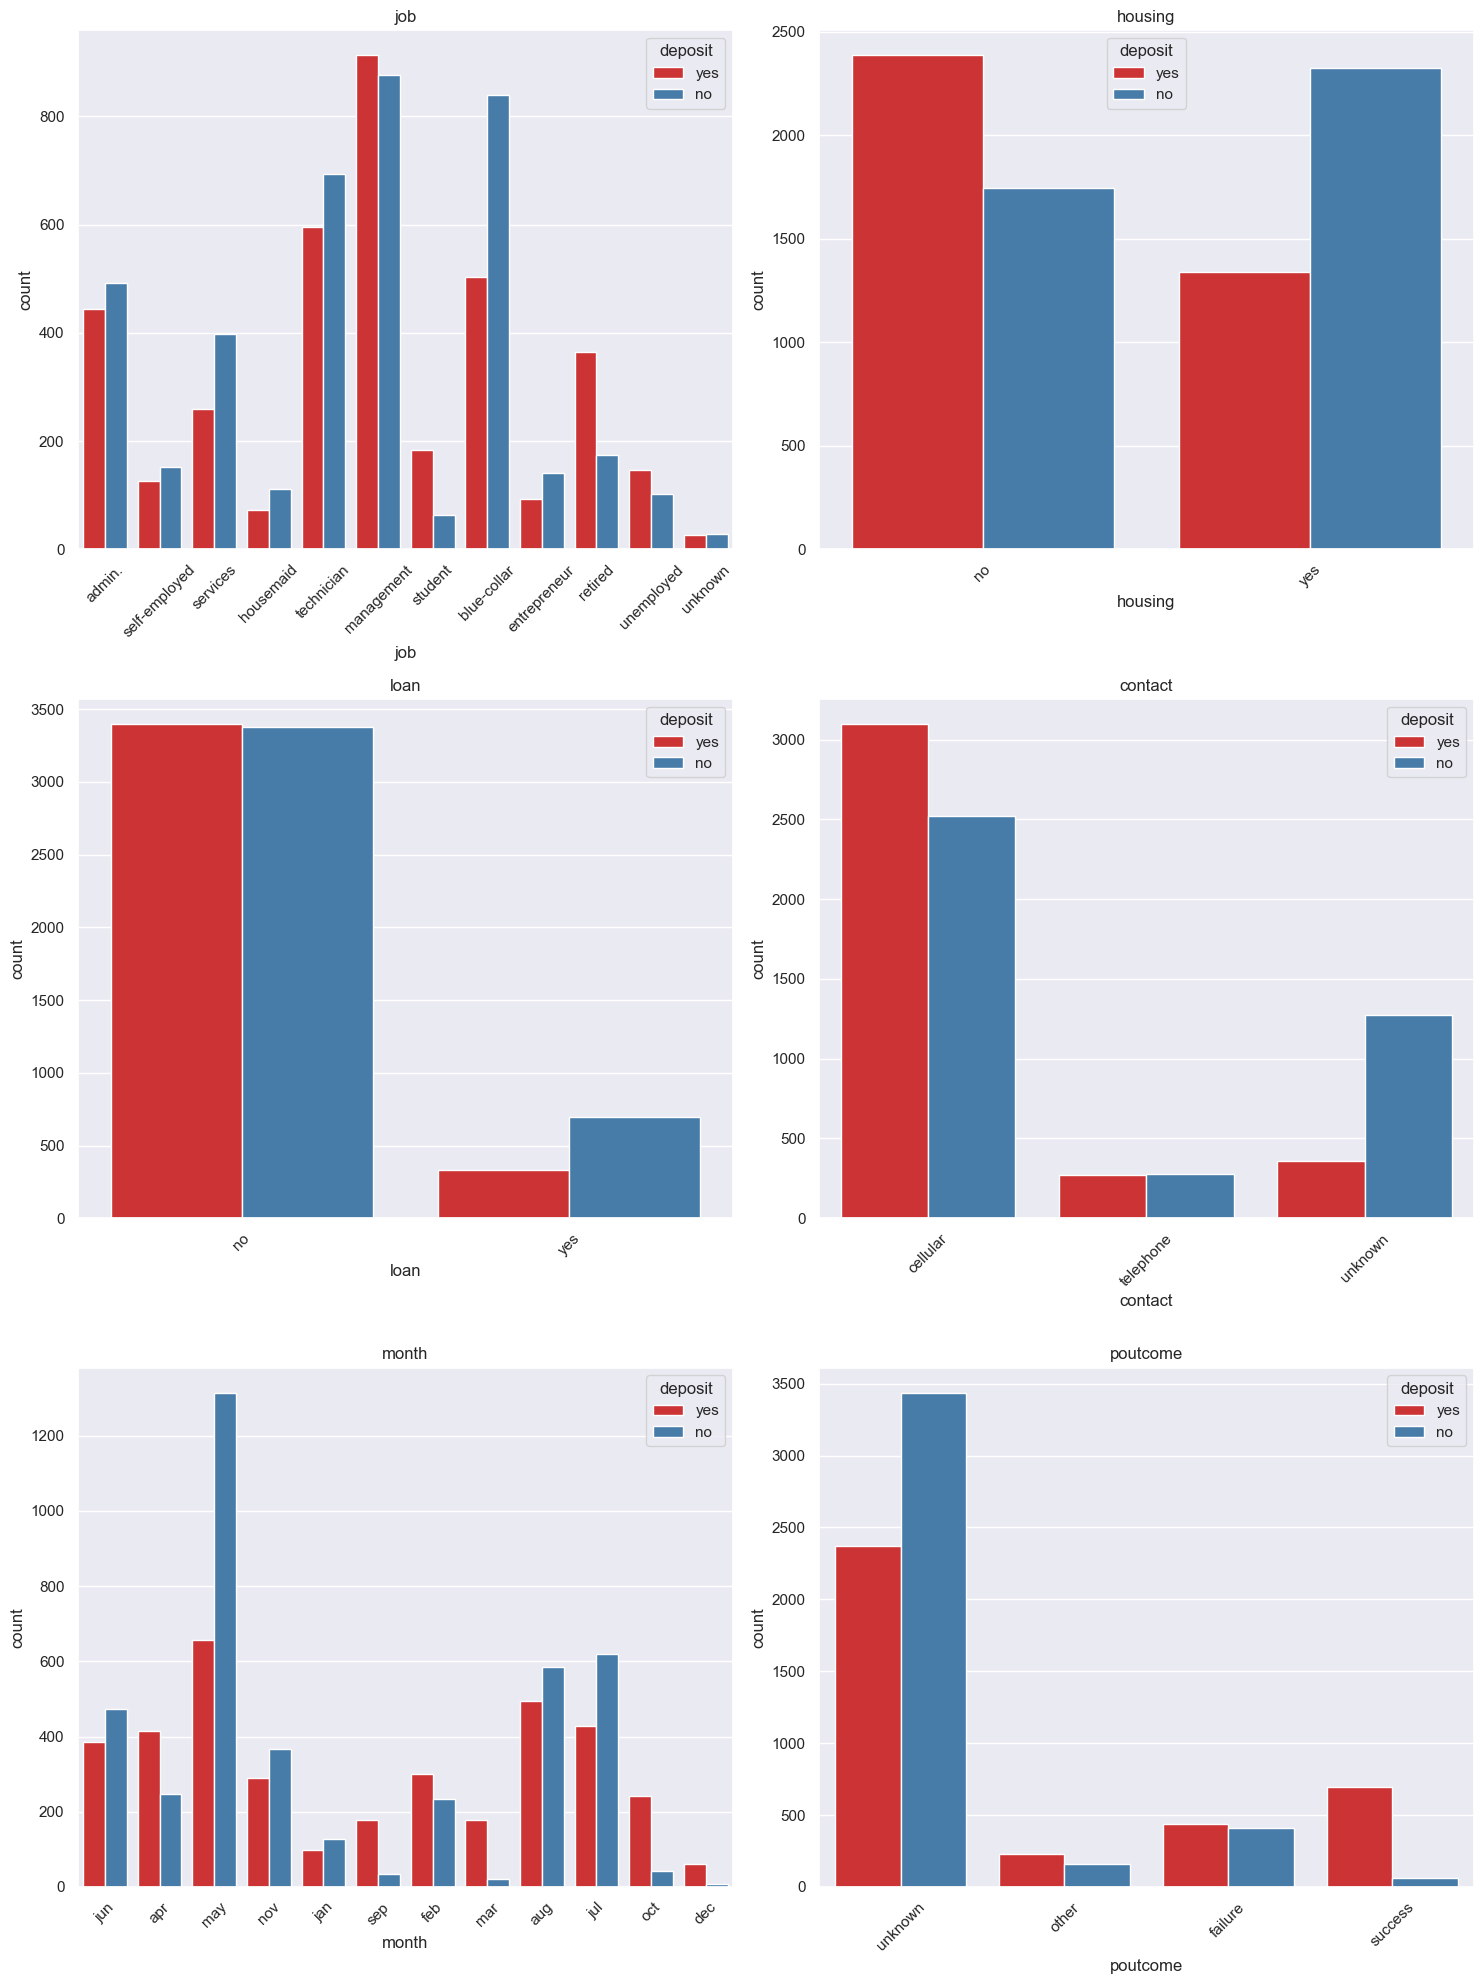

In [46]:
# Categorical Analysis (2)
features = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']

plt.figure(figsize=(15,20))
sns.set(palette='Set1')
plotnumber = 1

for feature in features:
    ax = plt.subplot(3,2,plotnumber)
    sns.countplot(data=df, x=feature, hue='deposit')
    plt.xlabel(feature)
    plt.title(feature)
    plt.xticks(rotation=45)
    plotnumber+=1
    plt.tight_layout()

Job

- More people who are a management, student, retired, or unemployed subscribed to term deposit rather than not subscribed.
- Many people work as technician and blue-collar but have less people subscribe to term deposit than subscribing.

Housing

- More people don't have housing loan and those people tends to subscribe to a term deposit.

Loan

- More people don't have personal loan and those people have almost the same proportion between subscribing and not subscribing to term deposit.

Contact

- More people contacted through cellular than telephone or unknown methods and people contacted through cellular have more people subscribing to term deposit than not subscribing.

Month

- May, August, and July are months with the most call made but more people not subscribing to term deposit.
- February, April, and October are months with the most people subscribing than not subscribing to term deposit.

Previous Outcome

- Unknown previous campaign outcome have the most people but the people subscribing is less than people subscribing to term deposit.
- Success previous campaign outcome have more people subscribing to term deposit than people not subscribing.

# Data Splitting

In [47]:
X = df.drop(columns='deposit')
y = np.where(df['deposit']=='yes',1,0)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=0
)

In [49]:
X_test.shape

(1561, 10)

# Data Preprocessing

In [50]:
df.describe().columns

Index(['age', 'balance', 'campaign', 'pdays'], dtype='object')

In [51]:
df.describe(include='object').columns

Index(['job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'], dtype='object')

In [52]:
# transformer
transformer = ColumnTransformer([
    ('onehot',OneHotEncoder(drop='first'),['job', 'housing', 'loan', 'contact', 'month','poutcome'])
], remainder='passthrough')

# scaler
scaler = RobustScaler(with_centering=False)

We only use one hot encoding because there is no ordinal column and we use robust scaler because in the numerical columns there are many outliers.

In [53]:
# extracting all feature names after transform
transformer.fit(X,y)
features = list(transformer.get_feature_names_out())

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'age',
 'balance',
 'campaign',
 'pdays']

# BENCHMARK MODEL

In [54]:
logreg = LogisticRegression(random_state=0)
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(tree,random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0,verbosity=0)

# Create a scorer for F0.5 score
f05_scorer = make_scorer(fbeta_score, beta=0.5)

We use f0.5 Score to put more weight in the precision without completely disregarding the recall score.

In [55]:
# Check the best benchmark model
models = [logreg,tree,rf,ada,gbc,xgbc]
model_name = []
score = []
train_score = []
mean_value = []
std_value = []

for i in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('transformer',transformer),
        ('scaler',scaler),
        ('model',i)
    ])

    model_cv = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring=f05_scorer,
        error_score='raise'
    )

    print(i,model_cv)

    score.append(model_cv)
    train_score.append(model_cv.mean())
    std_value.append(model_cv.std())
    model_name.append(i.__class__.__name__)   

LogisticRegression(random_state=0) [0.69093032 0.73630832 0.66368237 0.7098646  0.69014658]
DecisionTreeClassifier(random_state=0) [0.58813946 0.610268   0.5898034  0.62058527 0.61833333]
RandomForestClassifier(random_state=0) [0.69822271 0.70964247 0.67381039 0.70448647 0.70864662]
AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=0),
                   random_state=0) [0.59711506 0.59322034 0.58890701 0.60728036 0.62414266]
GradientBoostingClassifier(random_state=0) [0.7277628  0.75653924 0.6970297  0.7321926  0.72466777]
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=N

In [56]:
benchmark_model_train = pd.DataFrame({
    'model':model_name,
    'train_score':train_score,
    'std':std_value
}).sort_values(by='train_score',ascending=False)
benchmark_model_train

,model,train_score,std
4,GradientBoostingClassifier,0.727638,0.018983
2,RandomForestClassifier,0.698962,0.013203
0,LogisticRegression,0.698186,0.024073
5,XGBClassifier,0.691839,0.018316
1,DecisionTreeClassifier,0.605426,0.013876
3,AdaBoostClassifier,0.602133,0.012573


In [57]:
# check the best benchmark model on test
test_score = []
model_name = []

for i in models:
    model_pipeline = Pipeline([
        ('transformer',transformer),
        ('scaler',scaler),
        ('model',i)
    ])

    # fitting
    model_pipeline.fit(X_train,y_train)

    # predict
    y_pred_test = model_pipeline.predict(X_test)

    # evaluate
    f0_5 = fbeta_score(y_test,y_pred_test,beta=0.5)
    test_score.append(f0_5)
    model_name.append(i.__class__.__name__)

In [58]:
benchmark_model_test = pd.DataFrame({
    'model':model_name,
    'test_score':test_score
}).sort_values(by='test_score',ascending=False)
benchmark_model_test

,model,test_score
4,GradientBoostingClassifier,0.715693
0,LogisticRegression,0.694178
2,RandomForestClassifier,0.688614
5,XGBClassifier,0.684434
3,AdaBoostClassifier,0.623321
1,DecisionTreeClassifier,0.619399


In [59]:
# combine and compare
benchmark_model = benchmark_model_test.set_index('model').join(benchmark_model_train.set_index('model'))
benchmark_model.drop('std',axis=1,inplace=True)
benchmark_model['diff'] = benchmark_model['test_score'] - benchmark_model['train_score']
benchmark_model['diff'] = benchmark_model['diff'].agg('abs') 
benchmark_model.sort_values(by='test_score',ascending=[False])

,test_score,train_score,diff
model,,,
GradientBoostingClassifier,0.715693,0.727638,0.011946
LogisticRegression,0.694178,0.698186,0.004009
RandomForestClassifier,0.688614,0.698962,0.010348
XGBClassifier,0.684434,0.691839,0.007405
AdaBoostClassifier,0.623321,0.602133,0.021188
DecisionTreeClassifier,0.619399,0.605426,0.013973


Benchmark Model on Score: Gradient Boost

Benchmark Model on Stability: Logistic Regression

# Hyperparameter Tuning

### Gradient Boost

In [60]:
# depth of tree
max_depth = [3,6,9,12]

# learning rate
learning_rate = [0.01,0.1,0.2]

# number of tree
n_estimators = [50,100,150]

# number of train set in each tree
subsample = [0.1,0.3,0.6]

# number of features used for splitting
max_features = [3,10,20]

# Hyperparameter GBC
hyperparameter_space_GBC = {
    'model__max_depth':max_depth,
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}

In [61]:
# Stratified K-Fold
skf = StratifiedKFold(n_splits=5)

# Benchmark Model 1
gbc = GradientBoostingClassifier(random_state=0)

# Create algorithm chain
estimator_gbc = Pipeline([
    ('transformer',transformer),
    ('model',gbc)
])

# hyperparameter tuning
grid_search_gbc = GridSearchCV(
    estimator=estimator_gbc,
    param_grid=hyperparameter_space_GBC,
    cv=skf,
    scoring=f05_scorer,
    n_jobs=-1
)

In [62]:
grid_search_gbc.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['job',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome'])])),
                                       ('model',
                                        GradientBoostingClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 6, 9, 12],
                         'model__max_features': [3, 10, 20],
                         'model__n_estimators': [50, 100, 150],
                         'model__subsample': [0.1, 0.3, 0.6]},
             scoring=make_scorer(fbeta_score, beta=0.5))

In [63]:
print('Gradient Boosting Classifier')
print('Best_score:',grid_search_gbc.best_score_)
print('Best_param:',grid_search_gbc.best_params_)

Gradient Boosting Classifier
Best_score: 0.7385023686629528
Best_param: {'model__learning_rate': 0.01, 'model__max_depth': 9, 'model__max_features': 3, 'model__n_estimators': 50, 'model__subsample': 0.6}


There is improvement in Gradient Boosting f0.5 score from 0.727 before tuning to 0.738 after tuning

### Logistic Regression

In [64]:
# benchmark model 2
logreg = LogisticRegression(random_state=0)

# adding polynomial feature for logistic regression
lr_poly = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)

lr_transformer = ColumnTransformer([
    ('onehot',OneHotEncoder(drop='first'),['job', 'housing', 'loan', 'contact', 'month','poutcome']),
    ('poly',lr_poly,['balance'])
], remainder='passthrough')


# Hyperparameter Logistic Regression
hyperparameter_space_logreg = {
    'model__penalty':['l1','l2','elasticnet',None],
    'model__C':[1000,100,10,1,0.1,0.01,0.001,0.0001],
    'model__class_weight':['balanced',None],
    'model__solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'model__max_iter':[100,500,1000,1500]
}

# create the algorithm chain
estimator_logreg = Pipeline([
    ('transformer',lr_transformer),
    ('scaler',scaler),
    ('model',logreg)
])

# hyperparameter tuning
grid_search_logreg = GridSearchCV(
    estimator=estimator_logreg,
    param_grid=hyperparameter_space_logreg,
    cv=skf,
    scoring=f05_scorer,
    n_jobs=-1
)

grid_search_logreg.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['job',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome']),
                                                                        ('poly',
                                                                         PolynomialFeatures(include_bias=False),
                                                                         ['balance'])])),
                                       ('scaler',
                                        RobustScale...
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001,
                                      0.0001],
                         'model__class_weight': ['balanced', None],
                         'model__max_iter': [100, 500, 1000, 1500],
                         'model__penalty': ['l1', 'l2', 'elasticnet', None],
                         'model__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                           'newton-cholesky', 'sag', 'saga']},
             scoring=make_scorer(fbeta_score, beta=0.5))

In [65]:
print('Logistic Regression Classifier')
print('Best_score:',grid_search_logreg.best_score_)
print('Best_param:',grid_search_logreg.best_params_)

Logistic Regression Classifier
Best_score: 0.7062850216762093
Best_param: {'model__C': 0.1, 'model__class_weight': None, 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


In [66]:
model = grid_search_logreg.best_estimator_
y_pred_logreg_tuning = model.predict(X_test)
print(classification_report(y_test,y_pred_logreg_tuning))
print('F0.5 Score Logistic Regression After Tuning:',fbeta_score(y_test,y_pred_logreg_tuning,beta=0.5))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       815
           1       0.72      0.60      0.65       746

    accuracy                           0.70      1561
   macro avg       0.70      0.69      0.69      1561
weighted avg       0.70      0.70      0.69      1561

F0.5 Score Logistic Regression After Tuning: 0.6922837585563161


In [67]:
model = GradientBoostingClassifier(random_state=0)

model_pipe_gbc = Pipeline([
    ('transformer',transformer),
    ('model',model)
])
model_pipe_gbc.fit(X_train,y_train)

y_pred = model_pipe_gbc.predict(X_test)
print(classification_report(y_test,y_pred))
print('F0.5 Score Gradient Boosting Before Tuning on X_test:',fbeta_score(y_test,y_pred,beta=0.5))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75       815
           1       0.76      0.58      0.66       746

    accuracy                           0.71      1561
   macro avg       0.72      0.71      0.71      1561
weighted avg       0.72      0.71      0.71      1561

F0.5 Score Gradient Boosting Before Tuning on X_test: 0.7156927117531188


In [68]:
# after
gbc_tuning = grid_search_gbc.best_estimator_

y_pred_gbc_tuning = gbc_tuning.predict(X_test)
print(classification_report(y_test,y_pred_gbc_tuning))
print('F0.5 Score Gradient Boosting After Tuning on X_test:',fbeta_score(y_test,y_pred_gbc_tuning,beta=0.5))

              precision    recall  f1-score   support

           0       0.66      0.88      0.76       815
           1       0.79      0.51      0.62       746

    accuracy                           0.70      1561
   macro avg       0.73      0.70      0.69      1561
weighted avg       0.73      0.70      0.69      1561

F0.5 Score Gradient Boosting After Tuning on X_test: 0.7158836689038032


Text(0.5, 1.0, 'GBC After Tuning')

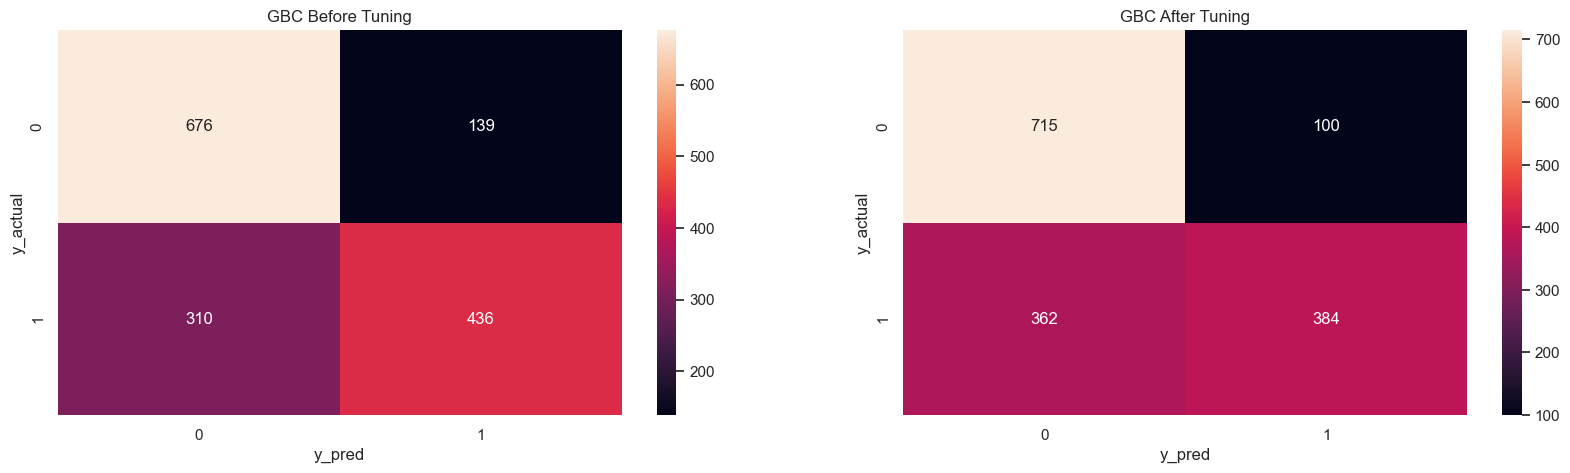

In [69]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('GBC Before Tuning')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,y_pred_gbc_tuning),annot=True,fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('GBC After Tuning')

**Best model is Gradient Boosting after hyperparameter tuning**

## Adjusting Threshold

In [70]:
### Retraining using best Parameter, and Selecting the best treshold to be used
#predict probability

model = gbc_tuning

model.fit(X_train, y_train)

y_prob = model.predict_proba(X_train)
y_prob = y_prob[:,1]


# threshold

threshold_value = [i/100 for i in range(20,80)]

score_list = []
score = 0

for i in threshold_value:

    # predict
    y_pred_th = np.where(y_prob>i,1,0)

    score_temp = fbeta_score(y_train,y_pred_th, beta=0.5)
    score_list.append(score_temp)

    if score_temp > score:
        score = score_temp
        best_score = score
        best_threshold = i
print('best f0.5 score :', best_score)
print('best threshold : ', best_threshold)

# check for recall
y_pred_th = np.where(y_prob>best_threshold, 1, 0)
score = precision_score(y_train, y_pred_th)
print("precision_score:",score)

best f0.5 score : 0.7764054514480409
best threshold :  0.49
precision_score: 0.8328003654636821


In [71]:
# predict data test
y_prob_test = model.predict_proba(X_test)
y_prob_test = y_prob_test[:,1]

y_pred_th = np.where(y_prob_test>0.49,1,0)
print('f0.5 score test:', fbeta_score(y_test,y_pred_th,beta=0.5))
print(classification_report(y_test,y_pred_th))

f0.5 score test: 0.7098976109215016
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       815
           1       0.76      0.56      0.64       746

    accuracy                           0.71      1561
   macro avg       0.72      0.70      0.70      1561
weighted avg       0.72      0.71      0.70      1561



Text(0.5, 1.0, 'GBC After Threshold')

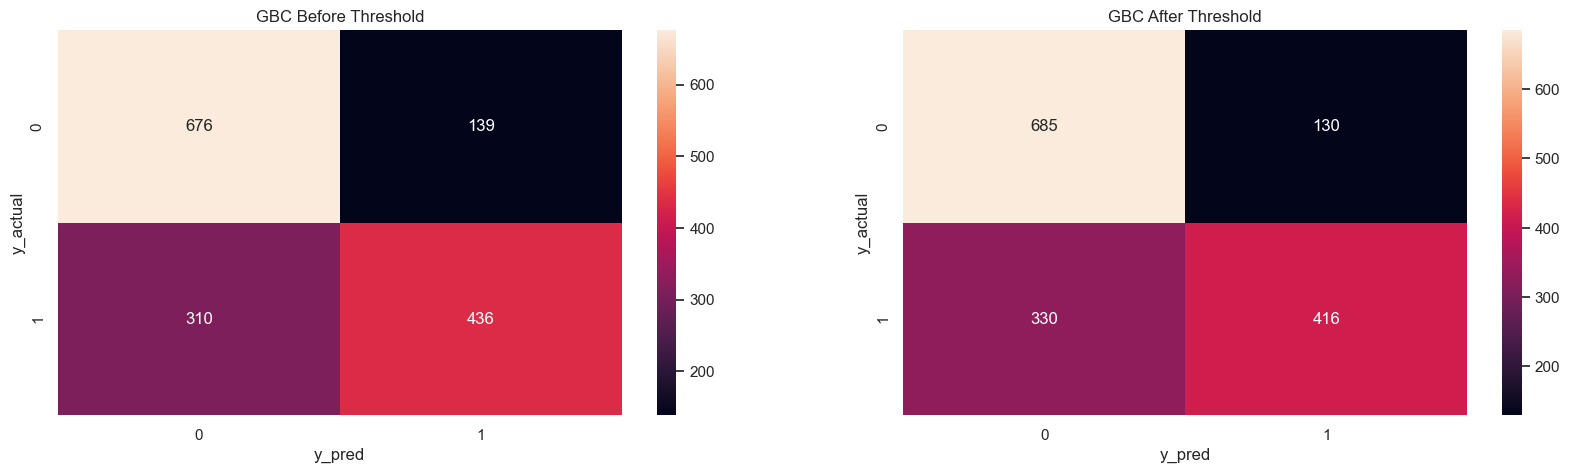

In [72]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('GBC Before Threshold')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,y_pred_th),annot=True,fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('GBC After Threshold')

**After adjusting the threshold, the f0.5 score improved to 0.77 in train but decreasing to 0.70 in test. We decide not to use threshold because it makes the model unstable and the f0.5 score in test without using threshold is better than using threshold which is 0.71**

**Best Model Score: GBC After Tuning without Threshold adjustment**

* TP: 436
* TN: 676
* FP: 139
* FN: 310

it shows the model are good in minimizing the False Positive, but not really good on minimizing the False Negative

# **Final Model**

In [73]:
# Best Model
model_final = gbc_tuning

# Predict
y_pred_final = model_final.predict(X_test)

## Feature Importance

In [74]:
features = list(transformer.get_feature_names_out())
list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'age',
 'balance',
 'campaign',
 'pdays']

In [75]:
imp = model_final[-1].feature_importances_
imp

array([0.01201081, 0.00374004, 0.00486519, 0.00543412, 0.0102781 ,
       0.00314776, 0.00518245, 0.01099198, 0.00437951, 0.00480039,
       0.0022219 , 0.08482866, 0.02578075, 0.00946693, 0.11381599,
       0.01496676, 0.00497622, 0.00671921, 0.00621796, 0.01442893,
       0.01458364, 0.02677215, 0.02673263, 0.00866535, 0.02892279,
       0.01681704, 0.00614923, 0.10382242, 0.03791029, 0.10874274,
       0.10381595, 0.04897751, 0.11983462])

In [76]:
# to dataframe
feature_imp = pd.DataFrame({
    'Importance':imp,
    'Features':list_features
}).sort_values(by='Importance',ascending=False)

In [77]:
feature_imp

,Importance,Features
32,0.119835,pdays
14,0.113816,contact_unknown
29,0.108743,age
27,0.103822,poutcome_success
30,0.103816,balance
11,0.084829,housing_yes
31,0.048978,campaign
28,0.037910,poutcome_unknown
24,0.028923,month_oct
21,0.026772,month_mar


<Axes: xlabel='Importance', ylabel='Features'>

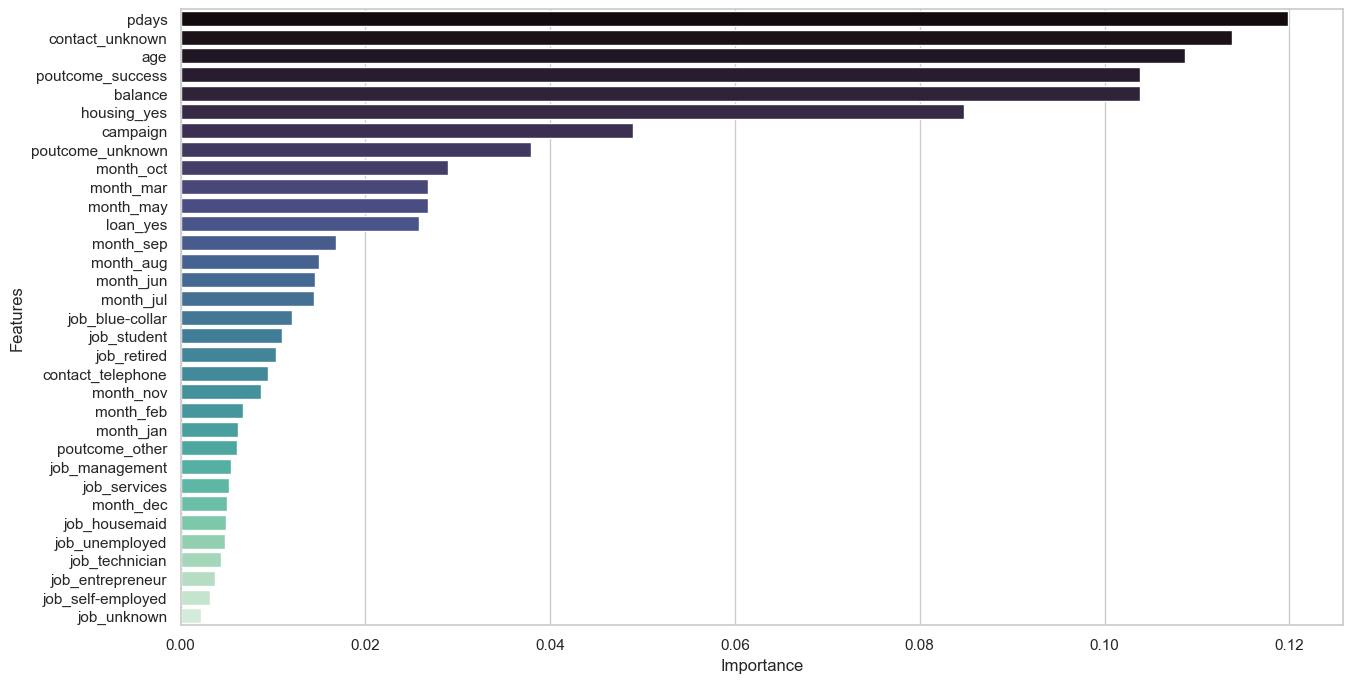

In [78]:
# Visualization
plt.figure(figsize=(15,8))
sns.set_theme(style='whitegrid')
sns.barplot(data=feature_imp,x='Importance',y='Features',orient='h',palette='mako')

**From the feature importance table we can see that job have low importance value and we will use the feature importance table to do feature selection**

## Feature Selection

In [79]:
# Feature selection based on feature importance
X = df.drop(['deposit','job'],axis=1)
y = np.where(df['deposit']=='yes',1,0)

# Data splitting
X_train_selection, X_test_selection, y_train_selection, y_test_selection = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

# Column transformer
transformer_feature_selection = ColumnTransformer([
    ('onehot',OneHotEncoder(drop='first'),['housing', 'loan', 'contact', 'month','poutcome'])
], remainder='passthrough')

# model pipeline using Gradient Boosting before tuning
model_pipeline_feature_selection_before_tuning = Pipeline([
    ('preprocess_feature_selection',transformer_feature_selection),
    ('model',model_pipe_gbc[-1])
])

# model pipeline using Gradient Boosting after tuning
model_pipeline_feature_selection_after_tuning = Pipeline([
    ('preprocess_feature_selection',transformer_feature_selection),
    ('model',grid_search_gbc.best_estimator_[-1])
])

In [80]:
# predict data train using model before tuning after feature selection
model_pipeline_feature_selection_before_tuning.fit(X_train_selection,y_train_selection)
y_pred_feature_selection_before_tuning_train = model_pipeline_feature_selection_before_tuning.predict(X_train_selection)

# print f0.5 score and classification report
print('f0.5 score on train before tuning and after feature selection:',fbeta_score(y_train_selection,y_pred_feature_selection_before_tuning_train,beta=0.5))
print(classification_report(y_train_selection,y_pred_feature_selection_before_tuning_train))

f0.5 score on train before tuning and after feature selection: 0.7545295613477431
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      3260
           1       0.79      0.64      0.71      2984

    accuracy                           0.75      6244
   macro avg       0.75      0.74      0.74      6244
weighted avg       0.75      0.75      0.74      6244



In [81]:
# predict data test using model before tuning after feature selection
y_pred_feature_selection_before_tuning_test = model_pipeline_feature_selection_before_tuning.predict(X_test_selection)

# print f0.5 score and classification report
print('f0.5 score on test before tuning and after feature selection:',fbeta_score(y_test_selection,y_pred_feature_selection_before_tuning_test,beta=0.5))
print(classification_report(y_test_selection,y_pred_feature_selection_before_tuning_test))

f0.5 score on test before tuning and after feature selection: 0.7277452891487978
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       815
           1       0.77      0.60      0.67       746

    accuracy                           0.72      1561
   macro avg       0.73      0.72      0.72      1561
weighted avg       0.73      0.72      0.72      1561



In [82]:
# predict data train using model after tuning and feature selection
model_pipeline_feature_selection_after_tuning.fit(X_train_selection,y_train_selection)
y_pred_feature_selection_after_tuning_train = model_pipeline_feature_selection_after_tuning.predict(X_train_selection)

# print f0.5 score and classification report
print('f0.5 score on train after tuning and feature selection:',fbeta_score(y_train_selection,y_pred_feature_selection_after_tuning_train,beta=0.5))
print(classification_report(y_train_selection,y_pred_feature_selection_after_tuning_train))

f0.5 score on train after tuning and feature selection: 0.7779255319148937
              precision    recall  f1-score   support

           0       0.71      0.90      0.79      3260
           1       0.85      0.59      0.69      2984

    accuracy                           0.75      6244
   macro avg       0.78      0.75      0.74      6244
weighted avg       0.77      0.75      0.74      6244



In [83]:
# predict data test using model after tuning and after feature selection
y_pred_feature_selection_after_tuning_test = model_pipeline_feature_selection_after_tuning.predict(X_test_selection)

# print f0.5 score and classification report
print('f0.5 score on test after tuning and feature selection:',fbeta_score(y_test_selection,y_pred_feature_selection_after_tuning_test,beta=0.5))
print(classification_report(y_test_selection,y_pred_feature_selection_after_tuning_test))

f0.5 score on test after tuning and feature selection: 0.7160625444207535
              precision    recall  f1-score   support

           0       0.67      0.86      0.75       815
           1       0.78      0.54      0.64       746

    accuracy                           0.71      1561
   macro avg       0.73      0.70      0.70      1561
weighted avg       0.72      0.71      0.70      1561



**After feature selection, we compare the model before and after tuning on data test and train. We choose model with better stability and higher score in data test which is Gradient Boosting before hyperparameter tuning.**

## Confusion Matrix After Feature Selection

Text(0.5, 1.0, 'GBC After Tuning')

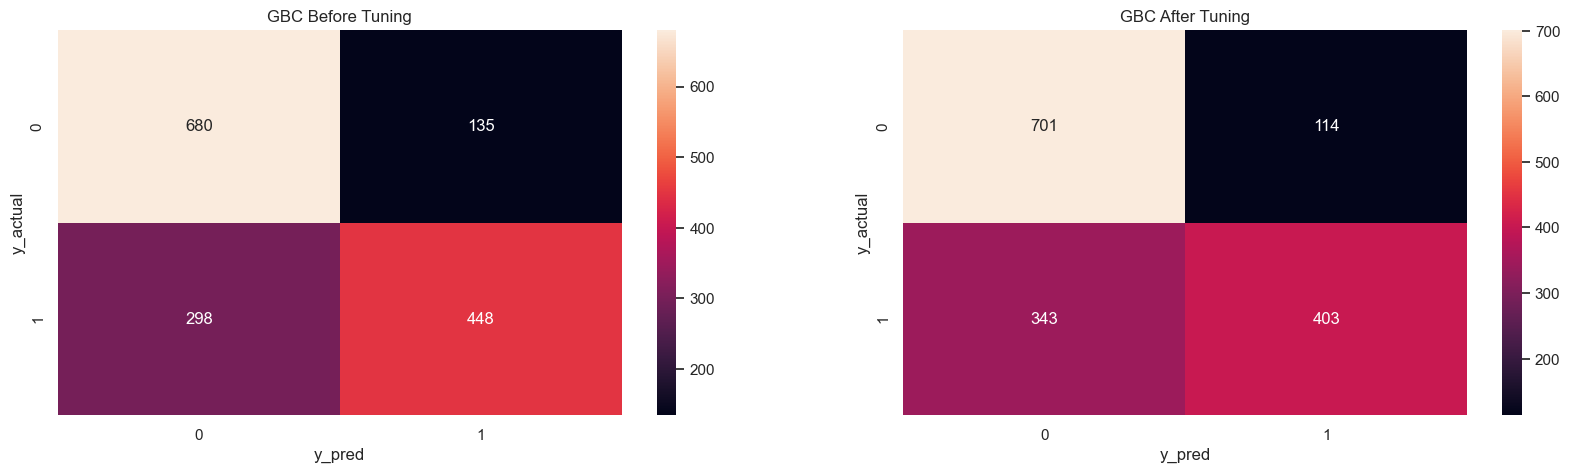

In [84]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test_selection,y_pred_feature_selection_before_tuning_test),annot=True,fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('GBC Before Tuning')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test_selection,y_pred_feature_selection_after_tuning_test),annot=True,fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('GBC After Tuning')

**Best model is GBC before tuning with better stability and f0.5 score 0.72 in test which is better than GBC after tuning with f0.5 score 0.71**

- TP : 448
- TN : 680
- FP : 135
- FN : 298

There is an overall improvement in the confusion matrix compare to before feature selection.

## Explainable AI

In [116]:
import shap
model_final = model_pipeline_feature_selection_before_tuning
model_final[-1]

GradientBoostingClassifier(random_state=0)

In [136]:
model_final[0].transform(X_test_selection)[0].shape

(22,)

In [118]:
# Explainer
explainer = shap.Explainer(
    model_final[1].predict,
    model_final[0].transform(X_test_selection)
)

shap_values = explainer(model_final[0].transform(X_test_selection))

PermutationExplainer explainer: 1562it [00:40, 30.38it/s]                          


In [119]:
i = 20
X_test_selection.iloc[i],y_test[i]

(age               43
 balance        11891
 housing           no
 loan              no
 contact     cellular
 month            dec
 campaign           5
 pdays            242
 poutcome     success
 Name: 6635, dtype: object,
 1)

In [120]:
features = list(model_final[0].get_feature_names_out())
list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'age',
 'balance',
 'campaign',
 'pdays']

In [121]:
[i for i in enumerate(list_features)]

[(0, 'housing_yes'),
 (1, 'loan_yes'),
 (2, 'contact_telephone'),
 (3, 'contact_unknown'),
 (4, 'month_aug'),
 (5, 'month_dec'),
 (6, 'month_feb'),
 (7, 'month_jan'),
 (8, 'month_jul'),
 (9, 'month_jun'),
 (10, 'month_mar'),
 (11, 'month_may'),
 (12, 'month_nov'),
 (13, 'month_oct'),
 (14, 'month_sep'),
 (15, 'poutcome_other'),
 (16, 'poutcome_success'),
 (17, 'poutcome_unknown'),
 (18, 'age'),
 (19, 'balance'),
 (20, 'campaign'),
 (21, 'pdays')]

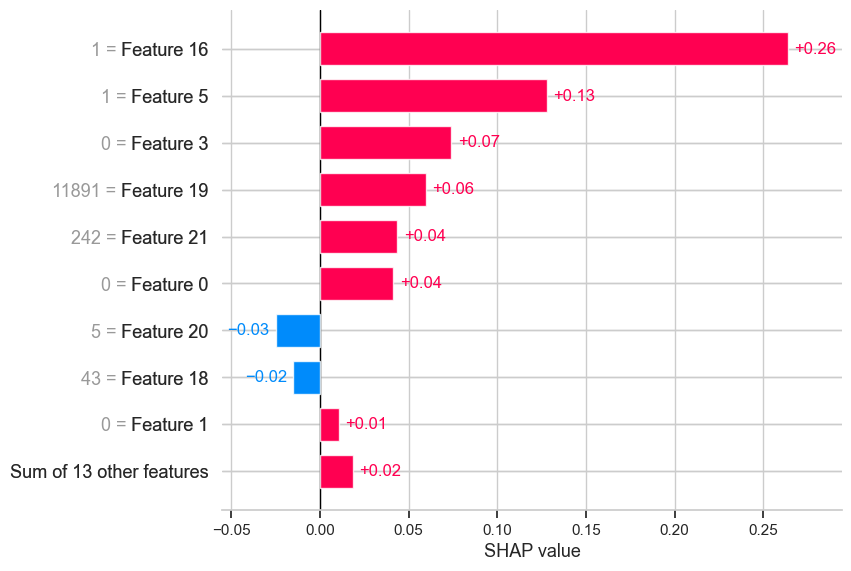

In [122]:
# shap_values for explain observation in test
shap.plots.bar(shap_values[i])

In [123]:
# Shap_values for explain all features in train
X_train_trans = model_final[0].transform(X_train_selection)

# explainer
explainer = shap.TreeExplainer(
    model_final.named_steps['model'],
    data = X_train_trans,
    feature_perturbation= 'interventional',
    model_output='probability'
)

# shap values
shap_values = explainer.shap_values(X_train_trans)

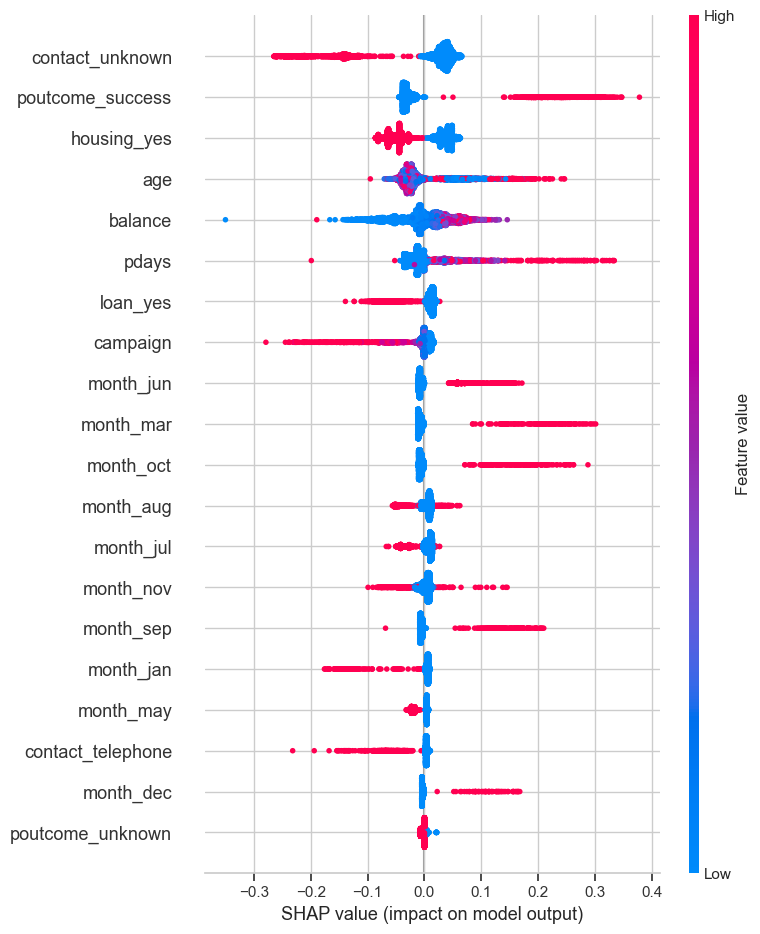

In [124]:
# summary plot for model in train
shap.summary_plot(
    shap_values,
    X_train_trans,
    feature_names=list_features
)

- if the contact_unknown value is 0 the probability of the target to be positive is increasing.
- if the poutcome_success value is 1 the probability of the target to be positive is increasing.
- if the housing_yes value is 0 the probability of the target to be positive is increasing.
- the observation on feature age is biased because when the value of age is high the probability of the target becoming positive can increase and decrease.
- the observation on feature balance is biased because when the value of age is high the probability of the target becoming positive can increase and decrease.

In [94]:
# LIME
import lime
from lime import lime_tabular

In [95]:
# explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data= model_final[0].transform(X_train_selection),
    feature_names= list_features,
    class_names= ['Not Deposit','Deposit'],
    mode='classification'
)
explainer

In [96]:
X_test_preprocessed = pd.DataFrame(model_final[0].transform(X_test_selection))
X_test_preprocessed.columns = list_features
X_test_preprocessed

,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,...,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,age,balance,campaign,pdays
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,64.0,2139.0,2.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,31.0,307.0,2.0,-1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,25.0,219.0,1.0,96.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,29.0,-20.0,2.0,-1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,53.0,109.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,36.0,4721.0,2.0,90.0
1557,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,52.0,1405.0,2.0,-1.0
1558,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,52.0,2398.0,1.0,-1.0
1559,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,37.0,197.0,3.0,-1.0


In [104]:
X_test_preprocessed.iloc[20]

housing_yes              0.0
loan_yes                 0.0
contact_telephone        0.0
contact_unknown          0.0
month_aug                0.0
month_dec                1.0
month_feb                0.0
month_jan                0.0
month_jul                0.0
month_jun                0.0
month_mar                0.0
month_may                0.0
month_nov                0.0
month_oct                0.0
month_sep                0.0
poutcome_other           0.0
poutcome_success         1.0
poutcome_unknown         0.0
age                     43.0
balance              11891.0
campaign                 5.0
pdays                  242.0
Name: 20, dtype: float64

The prediction of this customer is : Deposit --> from y_test


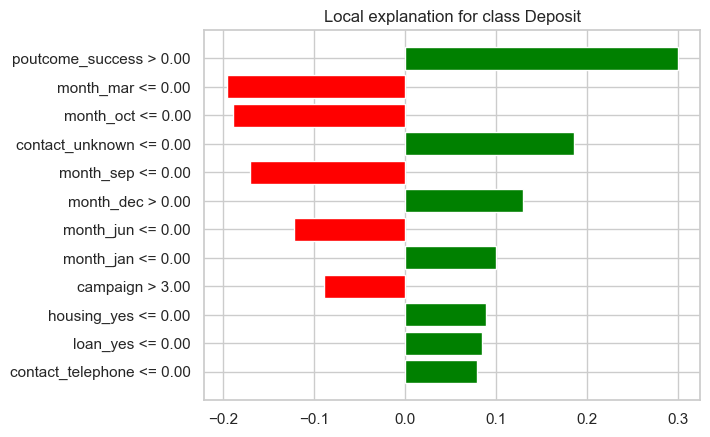

In [98]:
# lime observation using pyplot figure
i = 20

print(f'The prediction of this customer is : {("Deposit" if y_test[i] == 1 else "Do Not Deposit")} --> from y_test')

exp = explainer.explain_instance(
    X_test_preprocessed.iloc[i],
    model_final[-1].predict_proba,
    num_features=12
)

exp.as_pyplot_figure()
plt.show()

In [99]:
# lime observation using pyplot figure
i = 20

print(f'The prediction of this customer is : {("Deposit" if y_test[i] == 1 else "Do Not Deposit")} --> from y_test')

exp = explainer.explain_instance(
    X_test_preprocessed.iloc[i],
    model_final['model'].predict_proba
)   

exp.show_in_notebook(show_table=True)

The prediction of this customer is : Deposit --> from y_test


# Save Model

In [100]:
import pickle

In [110]:
# save only the model
model = model_pipeline_feature_selection_before_tuning[1]
X_train_selection_preprocessed = model_pipeline_feature_selection_before_tuning[0].fit_transform(X_train_selection)

model_final.fit(X_train_selection_preprocessed,y_train_selection)

pickle.dump(model_final, open('model.pkl','wb'))

In [102]:
# save only the column transformer
model_transformer = model_pipeline_feature_selection_before_tuning[0]
pickle.dump(model_transformer, open('model_transformer.pkl','wb'))

In [135]:
# save data test for predict
X_test[:100].to_csv('data_test.csv',index=False)

# Conclusion and Recommendation

## Conclusion
1. Without using ML model, the bank will target all customer for the marketing campaign. The average cost of telemarketing based in the U.S. is between $20 and $75 per hour. The marketing cost without using ML model if we use the lowest average cost is 1561 * $20 = $31,220.
([Telemarketing service pricing](https://www.magellan-solutions.com/blog/cost-of-telemarketing/))
2. With ML model prediction, the bank only target customer who are predicted to subscribe to the term deposit. The marketing cost will be (448+135) * $20 = $11,660.
3. If the company use the ML model, it will reduce the cost of marketing by 62.65%
4. From 583 customer targeted for marketing, the customer who really subscribe to term deposit is 448 which is 76.84% from total customer targeted.
5. Focus more on customer retention because the shap values for customer with previous campaign outcome success is high.

## Recommendation


1. Find new or creative way of marketing since telemarketing is not effective anymore.
1. Regularly review campaign performance and refine the ML models to improve accuracy and effectiveness.
1. Work with other teams to ensure the campaigns are aligned with customer insights and business objectives.
1. Create another model with different objective but still for improving the business.